# Import modules

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Changing the contrast and brightness of an image

$$ g(i,j) = \alpha f(i,j) + \beta $$

The parameters $ \alpha > 0 $ and $\beta$ are often called the gain and bias parameters; sometimes these parameters are said to control $ \textit{contrast} $ and $ \textit{brightness} $ respectively.

## Change brightness of picture

$$ g(i,j) = f(i,j) + \beta $$

<center>When $ \beta > 0 $ then image get brighter and in contrast, the image get darker if $ \beta < 0 $ </center>

In [2]:
def brightnessChange(img_1d, brightness=40):
    # Get height, width, num of channels information of a picture
    height, width, num_channels = img_1d.shape
    # Reshape 3d image np.ndarray into 2d image np.ndarray
    img_1d = img_1d.reshape(height * width, num_channels)
    # Because when we use PIL to read image the dtype of each pixels are uint8 (Unsigned integer (0 to 255))
    # so we have to set dtype to bigger type which is int16 (integer (-32768 to 32767))
    # If we want the picture to brighter we will add with a positive brightness value
    # In constrast if we want the picture darker we will add with a negative brightness value
    img_1d = img_1d.astype(np.int16) + brightness
    # Limit ndarray values to min and max with clip() method in numpy array
    # if RGBs of each pixels are < 0 then set it to 0
    # if RGBs of each pixels are > 255 then set it to 255
    # if RGBs of each pixels are in range(0,256) then get it.
    img_1d = np.clip(img_1d, 0, 255)
    # Convert 2d array to 3d array to get valid image array
    # Then set dtype back to np.uint8 to use imshow() from PIl
    return img_1d.reshape(height, width, num_channels).astype(np.uint8)

## Change contrast ratio of a picture

$$ g(i,j) = \alpha f(i,j) $$

<center> The bigger the $ \alpha $ is the more contrast of the image is </center>

In [3]:
def contrastChange(img_1d, contrastRatio):
    # Get height, width, num of channels information of a picture
    height, width, num_channels = img_1d.shape
    # Reshape 3d image np.ndarray into 2d image np.ndarray
    img_1d = img_1d.reshape(height * width, num_channels)
    # Multiply with the contrast ratio to make the difference of dark rgb and bright rgb increase
    img_1d = img_1d.astype(np.int16) * contrastRatio
    # Limit the array to fit the conditions of each pixels from 0->255
    img_1d = np.clip(img_1d, 0, 255)
    # Reshape to 3d array and convert type of each pixel to np.uint8 to use imshow()
    return img_1d.reshape(height, width, num_channels).astype(np.uint8)

## Flip a picture

In [4]:
def flipChange(img_1d, way='vertical'):
    # Get height, width, num of channels information of a picture
    height, width, num_channels = img_1d.shape
    if way == 'vertical':
        # Keep the original columns and get all the rows in reverse order
        # Initialize the list with the last row inside
        new_img = [img_1d[-1]]
        # Iterate (height - 1) times and append from ((height - 2) -> 0) rows
        for i in range(1, height):
            new_img = np.append(new_img, img_1d[height - i - 1])
        # Reshape to 3d np.ndarray
        return new_img.reshape(height, width, num_channels)
    if way == 'horizontal':
        # Keep the original rows and get all the columns in reverse order
        # Initialize the list with reverse columns of the first row inside
        new_img = [img_1d[0][::-1]]
        # Iterate (width - 1) times and append with reverse columns of (i -> (width - 1)) rows
        for i in range(1, width):
            new_img = np.append(new_img, img_1d[i][::-1])
        # Reshape to 3d np.ndarray
        return new_img.reshape(height, width, num_channels)

## Convert RGB picture to grayscale picture

Average method:
$$ Grayscale = \frac{(R + G + B)}{3} $$
Weighted method:
$$ New~grayscale~image = ((0.3 \times R) + (0.59 \times G) + (0.11 \times B)) $$

In [5]:
def grayscaleChange(img_1d, way='weighted'):
    # Get height, width, num of channels information of a picture
    height, width, num_channels = img_1d.shape
    # Reshape 3d image np.ndarray into 2d image np.ndarray
    img_1d = img_1d.reshape(height * width, num_channels)
    # Create a zeros numpy array with size (height*width, 1)
    new_img = np.zeros((height * width, 1))
    for i in range(height * width):
        if way == 'average':
            # Grayscale = (R + G + B / 3)
            new_img[i] = np.mean(img_1d[i])
        if way == 'weighted':
            # New grayscale image = ((0.3 * R) + (0.59 * G) + (0.11 * B))
            new_img[i] = 0.3 * img_1d[i][0] + 0.59 * img_1d[i][1] + 0.11 * img_1d[i][2]
    # Concatenate 3 RGB channels of each pixels
    new_img = np.concatenate((new_img,new_img,new_img), axis=1)
    # Reshape to 3d array and convert type of each pixel to np.uint8 to use imshow()
    return new_img.reshape(height, width, num_channels).astype(np.uint8)

## Blending 2 grayscale images with the same size

$$ g(x) = (1-\alpha) f_0(x) + \alpha f_1(x) $$

By varying $ \alpha $ from $0 \rightarrow 1 $ this operator can be used to perform a temporal $ \textit{cross-dissolve} $ between two images or videos, as seen in slide shows and film productions

In [6]:
def blendingChange(img_1d_1, img_1d_2, alpha):
    # Grayscale img_1d_1 and img_1d_2
    grayscale_img_1d_1 = grayscaleChange(img_1d_1)
    grayscale_img_1d_2 = grayscaleChange(img_1d_2)
    # Apply the above algorithm to blending 2 grayscale images above
    new_img = (1 - alpha) * grayscale_img_1d_1 + alpha * grayscale_img_1d_2
    # Convert type of each pixel to np.uint8 to use imshow()
    return new_img.astype(np.uint8)

# Blur a RGB image using Box Blur approach

In [7]:
def blurChange(img_1d, kernel_size=3):
    if kernel_size % 2 == 0:
        print('let kernel size be an odd number so that we can have a valid coordinate at the center of the kernel\n')
        return img_1d
    # Get height, width, num of channels information of a picture
    height, width, num_channels = img_1d.shape
    # Create new function to assign new value by using box blur approach
    new_img = np.zeros((height, width, num_channels))
    # padding count base on the size of kernel we pass in
    paddingCount = int((kernel_size - 1) / 2)
    for i in range(paddingCount, height - paddingCount):
        for j in range(paddingCount, width - paddingCount):
            # Topmost row index
            topRow = i - paddingCount
            # Leftmost row index
            leftCol = j - paddingCount
            # Get the kernel with size (kernel_size * kernel_size)
            kernel = img_1d[topRow:topRow + kernel_size, leftCol:leftCol + kernel_size]
            # Assign mean of each kernels to channels of each pixels
            for c in range(num_channels):
                new_img[i][j][c] = np.mean(kernel[:, :, c])

    # To get rid of black border outside we will assign the border with the first cells rows and columns we apply kernel mean
    for i in range(paddingCount):
        new_img[i][:][:] = new_img[paddingCount][:][:]
        new_img[height - paddingCount + i][:][:] = new_img[height - paddingCount - 1][:][:]
        
        new_img[:,i] = new_img[:,paddingCount]
        new_img[:,width - paddingCount + i] = new_img[:,width - paddingCount - 1]
    
    # Convert type of each pixel to np.uint8 to use imshow()
    return new_img.astype(np.uint8)

# Cut image with the circle frame

$$ (x_1)^2 + (x_2)^2 = R^2 $$

In [8]:
def circleCut(img_1d):
    # Get height, width, num of channels information of a picture
    height, width, num_channels = img_1d.shape
    # For easy, we will get the center as the middle of an image
    center = (int(height/2),int(width/2))
    # For easy, we will get the radius is the min of height/2 and width/2 to get a circle interface with outside borders.
    radius = min(int(height/2), int(width/2))
    
    mask = np.zeros((height,width), dtype=bool)
    for i in range(height):
        for j in range(width):
            x1 = (i - center[0])
            x2 = (j - center[1])
            # Circle equation: x^2 + y^2 = R^2
            if x1**2 + x2**2 <= radius**2:
                mask[i][j] = True
    
    # Create a copy of image array
    new_img = img_1d.copy()
    # Set the colors of pixels outside the circle to black.
    new_img[~mask] = np.zeros(num_channels)
    return new_img

# Cut image with 2 ellipse

$$ (\frac{x_1}{A_1})^2 + (\frac{x_2}{A_2})^2 - 2\frac{x_1x_2}{A_1A_2}cos{\Delta\varphi} = sin^2{\Delta\varphi} $$

In [9]:
def ellipseCut(img_1d):
    # Get height, width, num of channels information of a picture
    height, width, num_channels = img_1d.shape
    # For easy, we will get the center as the middle of an image
    center = (int(height/2),int(width/2))
    
    # a is length of semi-major axis and b is length of semi-minor axis. For easy, I will set default to these 2 values.
    a = int(height/2)
    b = int(width/2)
    
    # deltaPhi_1 is the top left to bottom right ellipse
    deltaPhi_1 = np.pi / 4
    # deltaPhi_2 is the top right to bottom left ellipse
    deltaPhi_2 = 3 * np.pi / 4
    
    mask = np.zeros((height,width), dtype=bool)
    for i in range(height):
        for j in range(width):
            x1 = (i - center[0])
            x2 = (j - center[1])
            if x1**2/a**2 + x2**2/b**2 - (2*x1*x2*np.cos(deltaPhi_1))/(a*b) <= np.sin(deltaPhi_1)**2:
                mask[i][j] = True
            if x1**2/a**2 + x2**2/b**2 - (2*x1*x2*np.cos(deltaPhi_2))/(a*b) <= np.sin(deltaPhi_2)**2:
                mask[i][j] = True

    # Create a copy of image array
    new_img = img_1d.copy()
    # Set the colors of pixels outside the ellipse to black.
    new_img[~mask] = np.zeros(num_channels)
    return new_img

# Display menu

In [10]:
def menuDisplay():
    print('Image processing\n')
    print('0. Run all functions\n')
    print('1. Change brightness of an image\n')
    print('2. Change contrast ratio of an image\n')
    print('3. Horizontal flip or Vertical flip an image\n')
    print('4. Convert RGB image into grayscale image\n')
    print('5. Blending 2 grayscale images with the same size\n')
    print('6. Blur an image\n')
    print('7. Circle cut an image\n')
    print('8. Ellipse cut an image\n')
    print('======================================\n')

# Display and export image to png file

In [11]:
def exportAndDisplayFigure(img_1d, fname):
    # Show image to console without border outside
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img_1d, aspect='auto')
    fig = plt.gcf()
    plt.show()
    # Export image array into 'png' file
    new_img = Image.fromarray(img_1d, 'RGB')
    new_img.save(fname)

## Main function

Image processing

0. Run all functions

1. Change brightness of an image

2. Change contrast ratio of an image

3. Horizontal flip or Vertical flip an image

4. Convert RGB image into grayscale image

5. Blending 2 grayscale images with the same size

6. Blur an image

7. Circle cut an image

8. Ellipse cut an image


Choose options you want (0->8): 0
Please enter name of image 1: rick512.jpg
Please enter name of image 2: lena512.jpg
Enter way you want the image to flip ('horizontal' or 'vertical'): vertical

Change brightness of a picture:


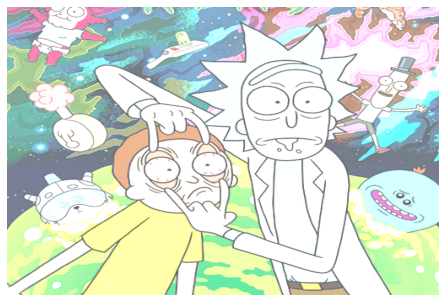


Change contrast ratio of a picture:


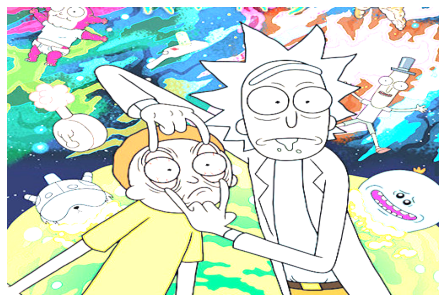


Vertical flip a picture:


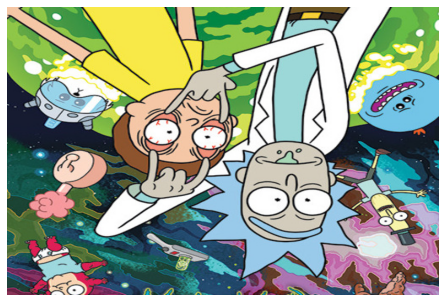


Grayscale a picture:


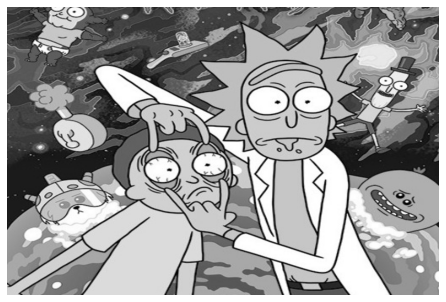


Blending 2 pictures:


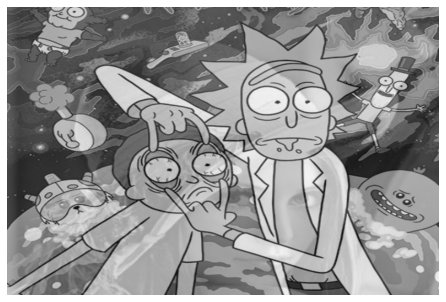


Blur a picture:


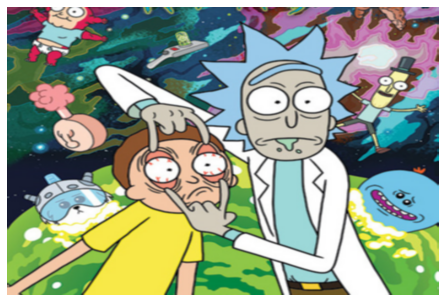


Circle cut a picture:


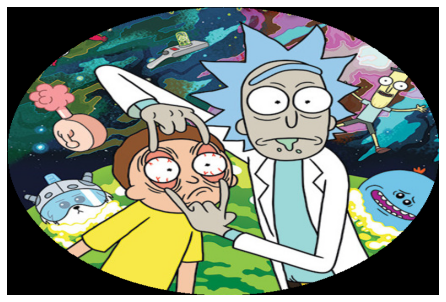


Ellipse cut a picture:


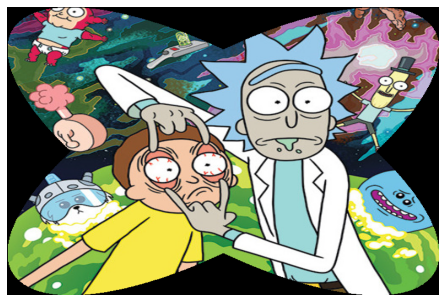

In [12]:
if __name__ == '__main__':
    menuDisplay()
    choose = int(input('Choose options you want (0->8): '))
    
    image_name_1, image_1, image_array_1 = ("","","")
    image_name_2, image_2, image_array_2 = ("","","")
    
    if choose == 1 or choose == 2 or choose == 3 or choose == 4 or choose == 6 or choose == 7 or choose == 8:
        image_name_1 = input('Please enter name of image: ')
        image_1 = Image.open(image_name_1)
        image_array_1 = np.array(image_1)
    if choose == 5 or choose == 0:
        image_name_1 = input('Please enter name of image 1: ')
        image_1 = Image.open(image_name_1)
        image_array_1 = np.array(image_1)
        image_name_2 = input('Please enter name of image 2: ')
        image_2 = Image.open(image_name_2)
        image_array_2 = np.array(image_2)
        
    export_image_1 = image_name_1.split('.')
    export_image_2 = image_name_2.split('.')
    brightness = 100
    contrastRatio = 2.5
    flip_way = ""
    gsWay = 'weighted'
    alpha = 0.3
    kernel_size = 3
    
    if choose == 3 or choose == 0:
        flip_way = input('Enter way you want the image to flip (\'horizontal\' or \'vertical\'): ')
    
    if choose == 1:
        bright_img = brightnessChange(image_array_1, brightness)
        print("\nChange brightness of a picture:")
        fname = export_image_1[0] + '_brightness.png'
        exportAndDisplayFigure(bright_img, fname)
    elif choose == 2:
        contrast_img = contrastChange(image_array_1, contrastRatio)
        print("\nChange contrast ratio of a picture:")
        fname = export_image_1[0] + '_contrast.png'
        exportAndDisplayFigure(contrast_img, fname)
    elif choose == 3:
        flip_img = flipChange(image_array_1, flip_way)
        print('\nHorizontal flip a picture:') if flip_way == 'horizontal' else print('\nVertical flip a picture:')
        fname = export_image_1[0] + '_flip.png'
        exportAndDisplayFigure(flip_img, fname)
    elif choose == 4:
        grayscale_img = grayscaleChange(image_array_1, gsWay)
        print("\nGrayscale a picture:")
        fname = export_image_1[0] + '_grayscale.png'
        exportAndDisplayFigure(grayscale_img, fname)
    elif choose == 5:  
        blending_image = blendingChange(image_array_1, image_array_2, alpha)
        print("\nBlending 2 pictures:")
        fname = export_image_1[0] + '_' + export_image_2[0] + '_blending.png'
        exportAndDisplayFigure(blending_image, fname)
    elif choose == 6:
        blur_image = blurChange(image_array_1, kernel_size)
        print("\nBlur a picture:")
        fname = export_image_1[0] + '_blur.png'
        exportAndDisplayFigure(blur_image, fname)
    elif choose == 7:
        circut_img = circleCut(image_array_1)
        print("\nCircle cut a picture:")
        fname = export_image_1[0] + '_circlecut.png'
        exportAndDisplayFigure(circut_img, fname)
    elif choose == 8:
        ellipcut_img = ellipseCut(image_array_1)
        print("\nEllipse cut a picture:")
        fname = export_image_1[0] + '_ellipsecut.png'
        exportAndDisplayFigure(ellipcut_img, fname)
    else:
        # Brightness
        bright_img = brightnessChange(image_array_1, brightness)
        print("\nChange brightness of a picture:")
        exportAndDisplayFigure(bright_img, export_image_1[0] + '_brightness.png')
        # Contrast
        contrast_img = contrastChange(image_array_1, contrastRatio)
        print("\nChange contrast ratio of a picture:")
        exportAndDisplayFigure(contrast_img, export_image_1[0] + '_contrast.png')
        # Vertical or horizontal flip
        flip_img = flipChange(image_array_1, flip_way)
        print('\nHorizontal flip a picture:') if flip_way == 'horizontal' else print('\nVertical flip a picture:')
        exportAndDisplayFigure(flip_img, export_image_1[0] + '_flip.png')
        # Grayscale
        grayscale_img = grayscaleChange(image_array_1, gsWay)
        print("\nGrayscale a picture:")
        exportAndDisplayFigure(grayscale_img, export_image_1[0] + '_grayscale.png')
        # Blending 2 pictures
        blending_image = blendingChange(image_array_1, image_array_2, alpha)
        print("\nBlending 2 pictures:")
        exportAndDisplayFigure(blending_image, export_image_1[0] + '_' + export_image_2[0] + '_blending.png')
        # Blur a picture
        blur_image = blurChange(image_array_1, kernel_size)
        print("\nBlur a picture:")
        exportAndDisplayFigure(blur_image, export_image_1[0] + '_blur.png')
        # Circle cut an image
        circut_img = circleCut(image_array_1)
        print("\nCircle cut a picture:")
        exportAndDisplayFigure(circut_img, export_image_1[0] + '_circlecut.png')
        # Ellipse cut an image
        ellipcut_img = ellipseCut(image_array_1)
        print("\nEllipse cut a picture:")
        exportAndDisplayFigure(ellipcut_img, export_image_1[0] + '_ellipsecut.png')